<a href="https://colab.research.google.com/github/GuCuChiara/Skin-Cancer-Classification/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import cv2
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt

In [ ]:
longitud, altura = 160, 160
modelo = '/content/gdrive/My Drive/Colab Notebooks/Clasificador/modelo/modelo.h5'
pesos_modelo = '/content/gdrive/My Drive/Colab Notebooks/Clasificador/modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)

def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("La predicción es: Actinic_keratosis_AK = " + str(answer) )
  elif answer == 1:
    print("La predicción es: Basal_cell_carcinoma_BCC = " + str(answer) )
  elif answer == 2:
    print("La predicción es: Benign_keratosis_BKL = " + str(answer) )
  elif answer == 3:
    print("La predicción es: Dermatofibroma_DF = " + str(answer) )
  elif answer == 4:
    print("La predicción es: Melanocytic_nevus_NV = " + str(answer) )
  elif answer == 5:
    print("La predicción es: Melanoma_MEL = " + str(answer) )
  elif answer == 6:
    print("La predicción es: Squamous_cell_carcinoma_SCC = " + str(answer) )
  elif answer == 7:
    print("La predicción es: Vascular_lesion_VASC = " + str(answer) )
  #elif answer == 4:
   # print("La predicción es: ...!")
  #elif answer == 5:
   # print("La predicción es: ...!")
  return answer

predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/AK-ISIC_0031228.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/BCC-ISIC_0026156.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/BKL-ISIC_0012773_downsampled.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/DF-ISIC_0031457.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/MEL-ISIC_0000393_downsampled.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/VASC-ISIC_0031270.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/NV-ISIC_0000114_downsampled.jpg')
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/SCC-ISIC_0028763.jpg')

La predicción es: Actinic_keratosis_AK = 0
La predicción es: Benign_keratosis_BKL = 2
La predicción es: Melanoma_MEL = 5
La predicción es: Squamous_cell_carcinoma_SCC = 6
La predicción es: Melanocytic_nevus_NV = 4
La predicción es: Vascular_lesion_VASC = 7
La predicción es: Vascular_lesion_VASC = 7
La predicción es: Actinic_keratosis_AK = 0


0

In [ ]:
predict_folder_path="/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict"
predicts=[]
img_size=160
for img in os.listdir(predict_folder_path):
    img = cv2.imread(os.path.join(predict_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    predicts.append(img_resize)

In [ ]:
predicts = np.array(predicts)
print(predicts.shape)

(16, 160, 160, 3)


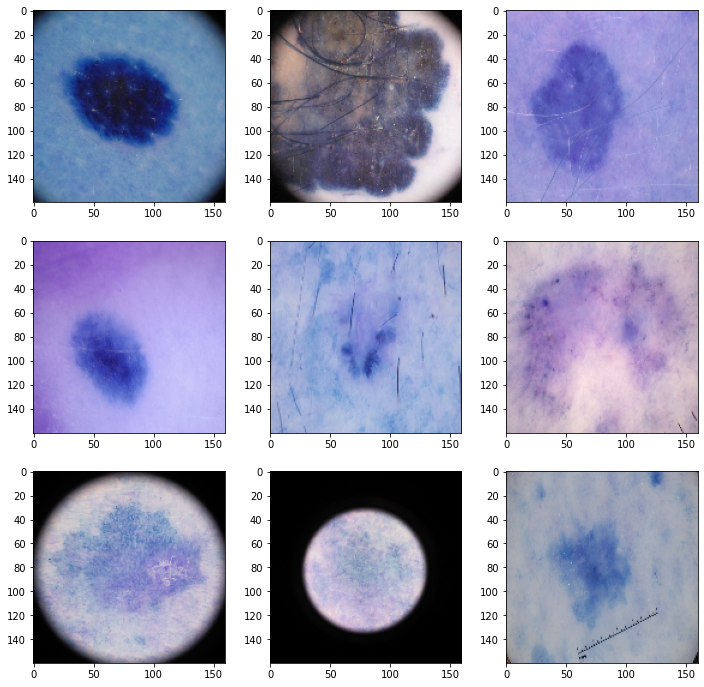

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(predicts[i].astype("uint8"))
  #plt.title(label=[predict(i)])
  plt.axis("on")

La predicción es: Actinic_keratosis_AK = 0
(160, 160, 3)


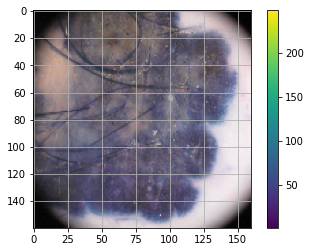

In [ ]:
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/MEL-ISIC_0000412_downsampled.jpg') #predicción
print(predicts[1].shape)
plt.figure()
plt.imshow(np.squeeze(predicts[1]))
plt.colorbar()
plt.grid(True)
plt.show()

La predicción es: Melanoma_MEL = 5
(160, 160, 3)


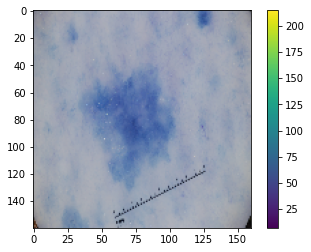

In [ ]:
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/BKL-ISIC_0012773_downsampled.jpg') #predicción
print(predicts[8].shape)
plt.figure()
plt.imshow(np.squeeze(predicts[8]))
plt.colorbar()
plt.grid(False)
plt.show()

La predicción es: Vascular_lesion_VASC = 7
(160, 160, 3)


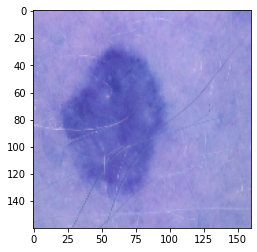

In [ ]:
predict('/content/gdrive/My Drive/Colab Notebooks/Clasificador/predict/NV-ISIC_0000114_downsampled.jpg') #predicción
print(predicts[2].shape)
#plt.figure()
plt.imshow(np.squeeze(predicts[2]))
#plt.colorbar()
#plt.grid(False)
#plt.show()

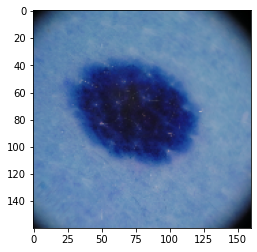

In [ ]:
plt.imshow(np.squeeze(predicts[1]))

In [ ]:
for x in os.listdir(predict_folder_path):
  #print(predicts['img'].shape)
  print(predicts[x].shape)

IndexError: ignored